In [23]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [32]:
#Import any library here only.
! pip install -q tensorflow opencv-python numpy matplotlib
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mplimg

In [12]:
from google.colab import drive
drive.mount('/gdrive')
data_path = "/gdrive/MyDrive/OpenCodeData"

os.chdir(data_path)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## <font color='orange'>Task #1</font>

Data loading and understanding data

In [ ]:
#Setup and check a gpu connection.

In [5]:
''' Do not change this cell '''
check_gpu()

GPU sucessfully connected


In [ ]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.

In [39]:
Images = []
Labels = []

normal_images_path = "NORMAL"
infected_images_path = "INFECTED"

print("Log: Reading normal Images")
for image_name in os.listdir(normal_images_path):
  image_path = os.path.join(normal_images_path, image_name)
  image = cv2.resize(mplimg.imread(image_path, 1), (280, 280))
  Images.append(image)
  Labels.append("normal")

print("Log: Reading infected Images")
for image_name in os.listdir(infected_images_path):
  image_path = os.path.join(infected_images_path, image_name)
  image = cv2.resize(mplimg.imread(image_path, 1), (280, 280))
  Images.append(image)
  if "bacteria" in image_name:
    Labels.append("bacteria")
  else:
    Labels.append("virus")

num_total_images = len(Labels)
num_normal = Labels.count("normal")
num_bacteria = Labels.count("bacteria")
num_virus = Labels.count("normal")

print()
print("Count of normal:", num_normal)
print("Count of bacteria:", num_bacteria)
print("Count of virus:", num_virus)


Log: Reading normal Images
Log: Reading infected Images

Count of normal: 234
Count of bacteria: 242
Count of virus: 234


In [24]:
''' Do not change this cell '''
check_data()

PASS


In [ ]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

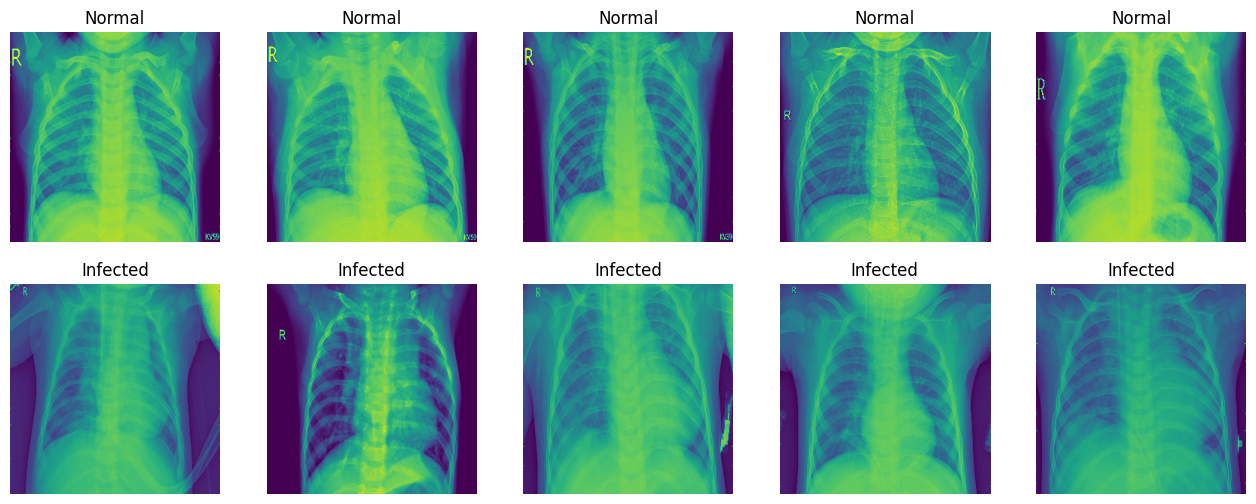

In [41]:
def getImagesByLabel(n, label):
  out = []
  for i in range(num_total_images):
    if Labels[i] in label:
      out.append(Images[i])
      if (len(out) >= n):
        return out

plt.figure(figsize = (16 , 6))

images_to_show = getImagesByLabel(5, ["normal"])
for i, image in enumerate(images_to_show):
  plt.subplot(2, 5, i+1)
  plt.title("Normal")
  plt.axis("off")
  plt.imshow(image)

images_to_show = getImagesByLabel(5, ["bacteria", "virus"])
for i, image in enumerate(images_to_show):
  plt.subplot(2, 5, i+6)
  plt.title("Infected")
  plt.axis("off")
  plt.imshow(image)

plt.show()